딥러닝에서 가장 중요한 건 각 층 데이터의 shape을 파악하는 것이다.

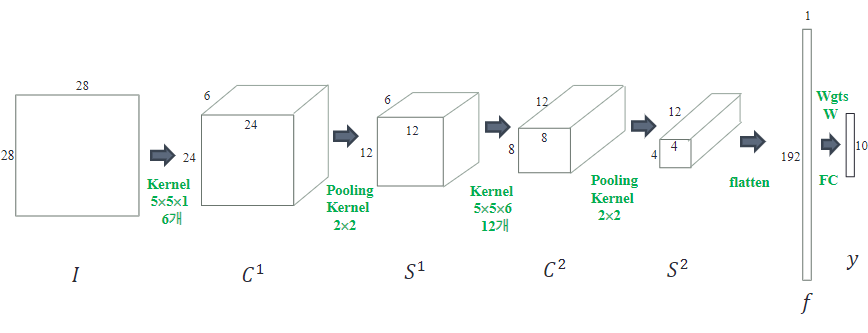

__CNN도 뉴런이 있다.__ 가중합 연산을 담당하는 것이 뉴런이다.

CNN(Convolutional Neural Network)에서 **그레디언트 계산**부터 **가중치 업데이트**까지의 과정을 단계별로 자세히 설명하겠습니다. 이 과정은 일반적으로 역전파(Backpropagation)와 경사하강법(Gradient Descent)을 기반으로 합니다. CNN의 핵심 구성 요소인 **컨볼루션 레이어**, **풀링 레이어**, 그리고 **완전 연결 레이어(FC layer)** 각각에서 그레디언트를 계산하고, 이를 바탕으로 가중치를 업데이트하는 과정이 포함됩니다.

### CNN 학습의 주요 단계

1. **순전파(Forward Pass)**:
   - 입력 데이터가 CNN의 각 레이어(컨볼루션 레이어, 풀링 레이어, 완전 연결 레이어)를 통과하면서 예측값이 계산됩니다. 이 과정에서 각 레이어의 출력을 기억해 둡니다. 이 출력값들은 나중에 그레디언트를 계산할 때 사용됩니다.

2. **손실 함수 계산(Loss Function)**:
   - 예측값과 실제 값(레이블) 간의 차이를 측정하기 위해 손실 함수(예: 크로스 엔트로피)를 사용하여 손실(loss)을 계산합니다. 이 값이 최적화의 목표가 되는 값입니다.

3. **역전파(Backpropagation)**:
   - 손실 함수로부터 시작하여, 그레디언트가 네트워크의 각 레이어를 거꾸로 거슬러 올라가며 계산됩니다. 이 과정은 각 레이어의 가중치가 손실에 얼마나 영향을 미치는지를 나타냅니다.
   
4. **가중치 업데이트(Weight Update)**:
   - 계산된 그레디언트를 이용해 가중치를 업데이트합니다. 이를 위해 경사하강법(Gradient Descent) 또는 다른 최적화 알고리즘을 사용합니다.

---

## 1. **순전파(Forward Pass)**

CNN에서 순전파는 입력 데이터가 각 레이어를 통과하면서 특징 맵(feature map)을 생성하고, 이를 바탕으로 예측값을 계산하는 과정입니다. 순전파의 주요 단계는 다음과 같습니다:

- **컨볼루션 레이어**: 입력 이미지와 필터(커널)를 컨볼루션하여 특징 맵을 계산합니다. 컨볼루션 연산의 수식은 다음과 같습니다:
  $$
  Z = X * W + b
  $$
  여기서 $Z$는 출력(feature map), $X$는 입력, $W$는 필터(가중치), $b$는 편향입니다.

- **활성화 함수**: 컨볼루션 결과에 비선형성을 추가하기 위해 ReLU(Rectified Linear Unit)와 같은 활성화 함수를 적용합니다.
  $$
  A = \text{ReLU}(Z)
  $$

- **풀링 레이어**: 풀링 연산(max-pooling 또는 average-pooling)을 통해 특징 맵을 다운샘플링합니다.

- **완전 연결 레이어(FC Layer)**: 컨볼루션과 풀링을 통해 얻은 특징 맵을 일렬로 펼쳐(flattening) 완전 연결 레이어에 입력하여 최종 예측값을 계산합니다.

---

## 2. **손실 함수 계산(Loss Function)**

CNN의 출력값(예측값)과 실제 레이블 간의 차이를 측정하기 위해 손실 함수를 사용합니다. **크로스 엔트로피 손실 함수**는 분류 문제에서 자주 사용됩니다. 손실 함수는 다음과 같습니다:

$$
L = - \sum_{i=1}^{C} y_i \log(p_i)
$$

여기서:
- $y_i$는 실제 레이블(one-hot 인코딩된 값),
- $p_i$는 예측 확률(softmax를 거친 값),
- $C$는 클래스의 수입니다.

---

## 3. **역전파(Backpropagation)**

역전파는 CNN에서 손실 함수를 각 레이어의 가중치에 대해 미분하여 그레디언트를 계산하는 과정입니다. 이는 체인 룰(chain rule)을 사용하여 수행됩니다. CNN의 각 레이어에 대해 그레디언트 계산을 어떻게 수행하는지 설명하겠습니다.

### (1) **출력층에서의 그레디언트 계산**

출력층에서는 손실 함수의 출력에 대한 그레디언트를 계산합니다. 예를 들어, softmax 함수와 크로스 엔트로피를 사용하는 분류 문제에서:

$$
\frac{\partial L}{\partial z_i} = p_i - y_i
$$

여기서 $z_i$는 출력층의 로짓 값이고, $p_i$는 softmax를 거친 예측 확률입니다.

### (2) **완전 연결층에서의 그레디언트 계산**

완전 연결층에서는 손실에 대한 가중치와 편향의 그레디언트를 계산해야 합니다.

- **가중치 $ W $에 대한 그레디언트**:
  $$
  \frac{\partial L}{\partial W} = A_{\text{prev}}^T \cdot \delta
  $$
  여기서 $A_{\text{prev}}$는 이전 레이어의 활성화 값이고, $\delta$는 출력층에서 전달된 그레디언트입니다.

- **편향 $ b $에 대한 그레디언트**:
  $$
  \frac{\partial L}{\partial b} = \delta
  $$

### (3) **컨볼루션 레이어에서의 그레디언트 계산**

컨볼루션 레이어에서 그레디언트를 계산하는 것은 Fully Connected 레이어보다 복잡합니다. 컨볼루션 레이어에서의 그레디언트 계산을 위해, 각 필터의 가중치 $W$에 대한 그레디언트와 입력 $X$에 대한 그레디언트를 구해야 합니다.

- **필터 가중치 $ W $에 대한 그레디언트**:
  $$
  \frac{\partial L}{\partial W} = X * \delta_{\text{conv}}
  $$
  여기서 $\delta_{\text{conv}}$는 컨볼루션 결과에 대한 그레디언트이고, $X$는 입력입니다. 이 연산은 컨볼루션과 유사하지만, 역전파 시 필터가 전치(transposed)되어 사용됩니다.

- **입력 $ X $에 대한 그레디언트**:
  $$
  \frac{\partial L}{\partial X} = W * \delta_{\text{conv}}^{T}
  $$
  여기서 $W$는 필터 가중치, $\delta_{\text{conv}}^{T}$는 전치된 그레디언트입니다.

### (4) **풀링 레이어에서의 그레디언트 계산**

풀링 레이어에서는 파라미터가 없기 때문에, 단순히 다음 레이어에서 넘어온 그레디언트를 입력 차원으로 "되돌리는" 역할을 합니다.

- **최대 풀링(Max Pooling) 레이어**:
  - 최대 풀링 레이어는 풀링 연산에서 선택된 최대 값에만 그레디언트를 전달합니다.
  - 역전파 시 해당 값이 선택된 위치로 그레디언트가 전달됩니다.

---

## 4. **가중치 업데이트(Weight Update)**

가중치 업데이트는 경사하강법(Gradient Descent)을 사용하여 이루어집니다. 계산된 그레디언트를 바탕으로 각 레이어의 가중치와 편향을 업데이트합니다. 기본적인 경사하강법의 수식은 다음과 같습니다:

$$
W_{\text{new}} = W_{\text{old}} - \eta \cdot \frac{\partial L}{\partial W}
$$

여기서:
- $ W_{\text{new}} $는 업데이트된 가중치,
- $ W_{\text{old}} $는 이전 가중치,
- $\eta$는 학습률(learning rate),
- $\frac{\partial L}{\partial W}$는 가중치에 대한 손실 함수의 그레디언트입니다.

같은 방식으로 편향도 업데이트됩니다.

---

## 요약

1. **순전파(Forward Pass)**: 입력 데이터가 각 레이어를 통과하면서 출력값(예측값)을 계산.
2. **손실 함수 계산**: 예측값과 실제 값의 차이를 측정하여 손실을 계산.
3. **역전파(Backpropagation)**: 손실 함수에 대한 그레디언트를 계산하여 각 레이어의 가중치에 대한 변화량(그레디언트)을 구함.
4. **가중치 업데이트**: 경사하강법을 통해 계산된 그레디언트를 사용하여 가중치와 편향을 업데이트.

이러한 과정이 반복적으로 수행되면서, CNN은 점차적으로 손실을 줄이고 예측 성능을 향상시킵니다.

CNN(Convolutional Neural Network)에서 **그레디언트에 해당하는 인덱스를 찾는 것**은 매우 중요한 이유가 있습니다. 특히, CNN의 구조에서는 입력 이미지에 대해 국소적 필터링을 수행하는 **컨볼루션 연산**과 **풀링 연산**이 포함되어 있으며, 각 레이어에서의 그레디언트가 **공간적으로 위치**에 의존하기 때문에 각 위치에 맞는 그레디언트를 정확히 계산하는 것이 매우 중요합니다.

### 1. **그레디언트의 인덱스와 공간적 위치**

CNN은 공간적인 구조를 활용하여 이미지를 처리하기 때문에, 각 특징 맵(feature map)에서의 값은 입력 이미지의 특정한 부분에 대한 정보를 담고 있습니다. 즉, 입력 이미지의 어느 부분에서 필터가 적용되었는지, 그리고 그 필터가 학습 중에 어떻게 변화해야 하는지를 알기 위해서는 **해당 그레디언트가 어떤 위치에서 나온 것인지**를 정확히 파악해야 합니다.

#### 주요 이유:

- **역전파 과정에서 공간 정보 유지**: 컨볼루션 레이어는 입력의 각 **위치**에 대해 필터가 학습되므로, 역전파(backpropagation) 과정에서 필터의 각 위치에 해당하는 그레디언트가 정확히 계산되어야 합니다. 그레디언트가 올바르게 인덱싱되지 않으면 잘못된 방향으로 가중치가 업데이트되어 학습이 실패할 수 있습니다.
  
- **지역적 연결(local connectivity)**: CNN에서는 각 뉴런이 전체 입력의 작은 영역만을 보고 국소적 연결을 갖습니다. 이 때문에, 각 필터가 보는 영역의 위치에 맞는 그레디언트를 정확히 찾아야만 가중치 업데이트가 정확하게 이루어질 수 있습니다.

---

### 2. **그레디언트 계산과 인덱스의 역할**

CNN에서 역전파는 컨볼루션, 풀링, 그리고 완전 연결 층을 포함하여 여러 레이어에 걸쳐 이루어지며, 각 레이어의 출력에 대한 그레디언트를 체인 룰을 통해 계산합니다. 이때 **정확한 인덱스**를 찾는 것은 필수적입니다.

#### **(1) 컨볼루션 레이어에서의 그레디언트 계산**

컨볼루션 레이어에서의 가중치 그레디언트는 입력과 필터 간의 **위치적 관계**를 기반으로 계산됩니다. 입력에 대한 필터의 위치마다 그레디언트가 다르게 계산되므로, 각 위치에서의 그레디언트가 정확한 인덱스로 처리되어야 합니다.

##### 가중치 $ W $에 대한 그레디언트 계산:

컨볼루션 레이어에서 필터 $ W $에 대한 그레디언트를 계산할 때는 다음과 같이 수행됩니다:

$$
\frac{\partial L}{\partial W_{i,j,k,l}} = \sum_{m,n} \delta_{m,n,k} \cdot X_{m+i, n+j, l}
$$

여기서:
- $ \delta_{m,n,k} $는 출력 특징 맵의 위치 $ (m,n) $에서의 그레디언트,
- $ X_{m+i, n+j, l} $는 입력 이미지에서 $ (m+i, n+j) $ 위치의 값,
- $ W_{i,j,k,l} $는 필터의 $ (i,j) $ 위치에서의 가중치.

##### 입력 $ X $에 대한 그레디언트 계산:

입력 $ X $에 대한 그레디언트는 필터 $ W $와 그레디언트 $ \delta $ 간의 역전파를 통해 계산됩니다:

$$
\frac{\partial L}{\partial X_{i,j,l}} = \sum_{m,n} W_{i-m,j-n,l,k} \cdot \delta_{m,n,k}
$$

이때도 **인덱스** $ i, j $는 입력 이미지의 위치를 나타내며, 이 위치에 맞는 그레디언트를 올바르게 찾아야만 역전파가 제대로 이루어집니다.

#### **(2) 풀링 레이어에서의 그레디언트 계산**

풀링 레이어는 보통 **최대 풀링(Max Pooling)**을 사용하며, 이 경우 **최대값이 선택된 위치**로만 그레디언트가 전달됩니다. 여기서 인덱스를 정확히 찾는 것이 매우 중요합니다.

##### 최대 풀링에서의 역전파:

최대 풀링에서 그레디언트를 계산할 때는 다음과 같은 방식으로 진행됩니다:

$$
\frac{\partial L}{\partial X_{i,j,k}} = 
\begin{cases} 
    \delta_{m,n,k} & \text{if } X_{i,j,k} \text{ is the maximum value in its pooling window} \\
    0 & \text{otherwise}
\end{cases}
$$

여기서:
- $ X_{i,j,k} $는 입력의 $ (i,j) $ 위치에 있는 값,
- $ \delta_{m,n,k} $는 해당 풀링 윈도우에서의 그레디언트입니다.

즉, 풀링 윈도우 내에서 **최대값이 선택된 위치**로만 그레디언트가 전달되므로, 그 **인덱스**가 정확히 추적되어야 합니다. 이를 통해 해당 위치에 있는 값만이 그레디언트를 받게 됩니다.

---

### 3. **정확한 인덱스 추적의 중요성**

- **컨볼루션 필터**가 입력의 어느 위치에서 활성화되었는지를 정확히 추적하고, 해당 위치의 그레디언트를 필터 가중치에 올바르게 전달해야 합니다.
  
- **풀링 레이어**에서는 최대값이 선택된 위치로만 그레디언트가 전달되므로, 이 위치를 정확히 추적하지 못하면 학습이 제대로 이루어지지 않습니다.

- **차원의 변화**: CNN에서는 **공간적 차원**이 풀링과 컨볼루션을 통해 축소되거나 변형됩니다. 이때 출력 특징 맵의 각 요소가 입력 공간에서 어떤 영역에 대응하는지 정확히 알기 위해 인덱스를 추적하는 것이 필수적입니다.

---

### 4. **정리된 수식과 과정**

CNN에서 그레디언트를 계산하고 인덱스를 찾는 과정은 크게 다음과 같습니다:

#### (1) **컨볼루션 레이어의 그레디언트**:

- 가중치 $ W $에 대한 그레디언트:
  $$
  \frac{\partial L}{\partial W_{i,j,k,l}} = \sum_{m,n} \delta_{m,n,k} \cdot X_{m+i, n+j, l}
  $$

- 입력 $ X $에 대한 그레디언트:
  $$
  \frac{\partial L}{\partial X_{i,j,l}} = \sum_{m,n} W_{i-m,j-n,l,k} \cdot \delta_{m,n,k}
  $$

#### (2) **풀링 레이어의 그레디언트**:

- 최대 풀링에서의 그레디언트:
  $$
  \frac{\partial L}{\partial X_{i,j,k}} = 
  \begin{cases} 
      \delta_{m,n,k} & \text{if } X_{i,j,k} \text{ is the maximum value in its pooling window} \\
      0 & \text{otherwise}
  \end{cases}
  $$

---

### 결론

CNN에서 그레디언트에 해당하는 인덱스를 찾는 것은 **공간적 위치**에 기반한 학습을 위해 매우 중요합니다. 각 레이어에서의 역전파 과정에서, 입력의 어느 위치에서 필터가 작용했는지, 그리고 풀링된 값이 어느 위치에서 발생했는지를 정확히 추적하여 그에 해당하는 그레디언트를 올바른 가중치에 전달해야 합니다. 이를 통해 **정확한 학습**과 **효율적인 가중치 업데이트**가 가능합니다.